Found 785268 images belonging to 14 classes.
Found 261761 images belonging to 14 classes.
Found 261761 images belonging to 14 classes.


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,276,750 (4.87 MB)

 Trainable params: 1,276,750 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24540/24540 ━━━━━━━━━━━━━━━━━━━━ 2537s 103ms/step - accuracy: 0.8592 - loss: 0.5483 - val_accuracy: 0.9866 - val_loss: 0.0529
Epoch 2/10
24540/24540 ━━━━━━━━━━━━━━━━━━━━ 2500s 102ms/step - accuracy: 0.9801 - loss: 0.0743 - val_accuracy: 0.9940 - val_loss: 0.0239
Epoch 3/10
24540/24540 ━━━━━━━━━━━━━━━━━━━━ 2573s 105ms/step - accuracy: 0.9891 - loss: 0.0398 - val_accuracy: 0.9961 - val_loss: 0.0153
Epoch 4/10
24540/24540 ━━━━━━━━━━━━━━━━━━━━ 2536s 103ms/step - accuracy: 0.9923 - loss: 0.0275 - val_accuracy: 0.9965 - val_loss: 0.0140
Epoch 5/10
24540/24540 ━━━━━━━━━━━━━━━━━━━━ 2599s 106ms/step - accuracy: 0.9937 - loss: 0.0215 - val_accuracy: 0.9969 - val_loss: 0.0123
Epoch 6/10
24540/24540 ━━━━━━━━━━━━━━━━━━━━ 2586s 105ms/step - accuracy: 0.9949 - loss: 0.0175 - val_accuracy: 0.9972 - val_loss: 0.0121
Epoch 7/10
24540/24540 ━━━━━━━━━━━━━━━━━━━━ 2689s 110ms/step - accuracy: 0.9954 - loss: 0.0155 - val_accuracy: 0.9972 - val_loss: 0.0111
Epoch 8/10
24540/24540 ━━━━━━━━━━━━━━━━━━

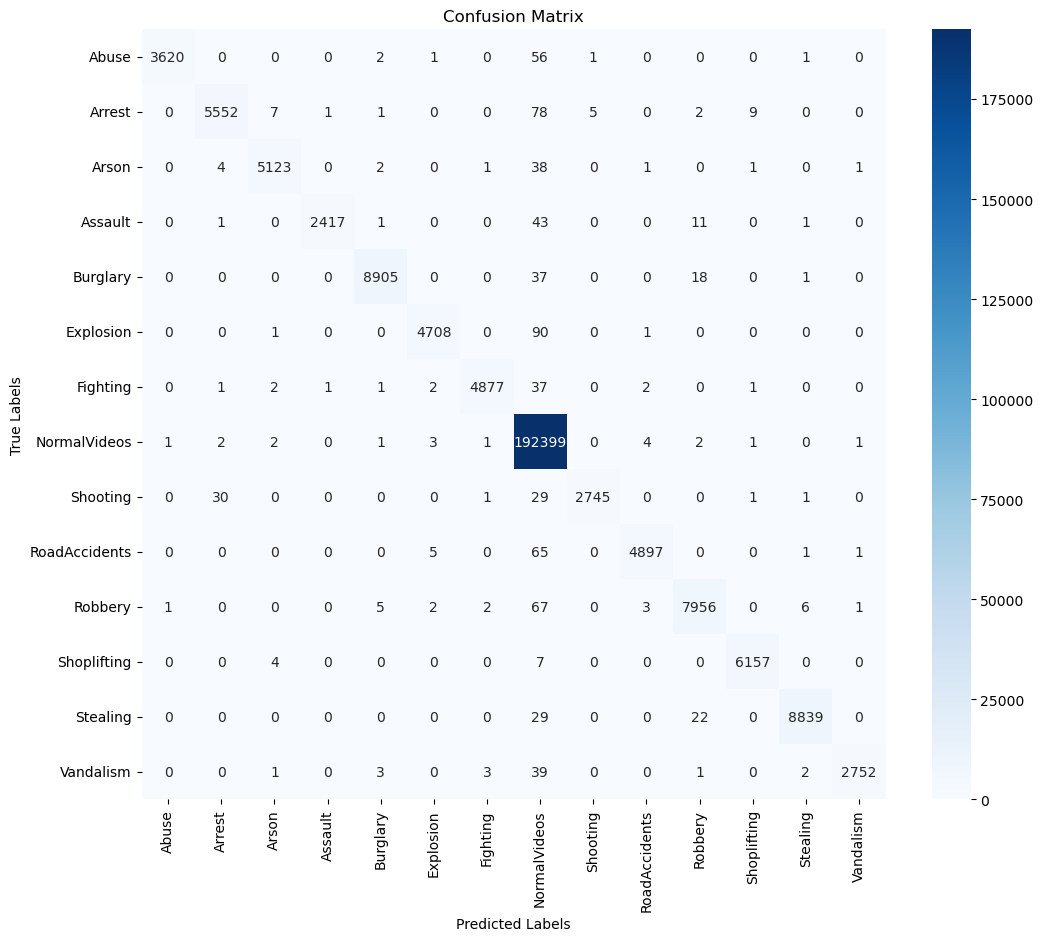

Model saved successfully.
Model Name: Custom CNN for CCTV Images
Number of Trainable Parameters: 1276750
Training Time: 26301.86 seconds
Detection Time: 476.39 seconds
Test Accuracy: 0.9970


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import time

# Paths to your dataset directories
train_dir = r'C:\Users\USER\Desktop\Aman\MajorProject\MP_193\Train'
valid_dir = r'C:\Users\USER\Desktop\Aman\MajorProject\MP_193\Valid'
test_dir = r'C:\Users\USER\Desktop\Aman\MajorProject\MP_193\Test'

# Parameters
img_width, img_height = 64, 64  # Image size for CCTV-like input
batch_size = 32
epochs = 10

# Class labels
class_labels = ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 'Fighting', 'NormalVideos', 
                'Shooting', 'RoadAccidents', 'Robbery', 'Shoplifting', 'Stealing', 'Vandalism']

num_classes = len(class_labels)  # Number of classes

# Data generators without augmentation
datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels
)

valid_generator = datagen.flow_from_directory(
    valid_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    classes=class_labels
)

# Function to create a custom CNN model for CCTV images
def create_cnn_model():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Multi-class output

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create and compile the CNN model
model = create_cnn_model()

# Print model summary
model.summary()

# Train the model
start_time = time.time()
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator
)
training_time = time.time() - start_time

# Evaluate the model on test data
start_detection_time = time.time()
y_pred = model.predict(test_generator)
detection_time = time.time() - start_detection_time

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report
class_report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(f'Classification Report:\n{class_report}')

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_cctv.png')
plt.show()

# Save the model
model.save(r'C:\Users\USER\Desktop\Aman\MajorProject\custom_cnn_model_cctv.h5')
print("Model saved successfully.")

# Print model details
print(f'Model Name: Custom CNN for CCTV Images')
print(f'Number of Trainable Parameters: {model.count_params()}')
print(f'Training Time: {training_time:.2f} seconds')
print(f'Detection Time: {detection_time:.2f} seconds')
print(f'Test Accuracy: {history.history["val_accuracy"][-1]:.4f}')